# Notebook content 
## 1- Build K-means model and apply it on data <br>
## 2- Image compression using K-means

#### K-mean steps 
- Randomly initialize centroids 
- Assign each example to nearest centroid
- Compute new centroids 
- Repeat 

In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from utils import *

# Build K-means model and apply it on data 

In [61]:
df = pd.read_csv("data.csv")

In [62]:
# convert data frame to numpy array
X = df.values

### 1-Randomly initialize centroids
- First randomly shuffles the indices of the examples using np.random.permutation()
- Then, it selects the first 𝐾 examples based on the random permutation of the indices

In [107]:
# permutation shuffles the indices so i need number of rows 
def random_centroids(X, k):
    m = X.shape[0]
    random_indices = np.random.permutation(m)
    
    # return first K centroids 
    centroids = X[random_indices[:k]]
    return centroids

In [113]:
c = random_centroids(X,3)

In [114]:
c

array([[4.60630534, 3.329458  ],
       [5.38736041, 2.26737346],
       [5.78769095, 3.29255127]])

Text(0, 0.5, 'Feature 1')

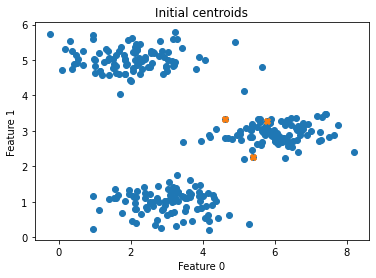

In [115]:
# Data with initial centroids
plt.scatter(X[:,0], X[:,1])
plt.scatter(c[:, 0], c[:,1], marker="X")
plt.title("Initial centroids")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 2- Assign each example to nearest centroid
Her we use norm distance and find closest centroid for each example 


In [67]:
def find_closest_centroid(X, centroids):
    m,n = X.shape
    k = centroids.shape[0] # as centroid shape is (k,n)
    c_i = np.zeros(m)
    
    for i in range(m):
        distance = []
        # Find distace between each example and all centroids
        for j in range(k):
            ij_norm = np.linalg.norm(X[i] - centroids[j])
            distance.append(ij_norm)
        
        #assign to each exapmle index the closet centroid
        c_i[i] = np.argmin(distance)
    
    return c_i

In [68]:
c_i = find_closest_centroid(X, c)

### 3- Compute new centroids 
- get new centroids by divide sum of each centroids examples on their count

In [69]:
def compute_centroids(X, c_i, k):
    centroids = np.zeros((k, X.shape[1])) 
    for i in range(k):
        centroids[i] = sum(X[c_i == i]) / np.count_nonzero(c_i == i)
    
    return centroids

In [70]:
compute_centroids(X, c_i, 3)

array([[3.15481989, 5.03353702],
       [1.62981801, 4.00815793],
       [4.88929085, 2.10459114]])

### 4- Repeat 

In [71]:
# k-means function 
def kMeans_model(X, k, iteratons=10):
    m,n = X.shape
    c_i = np.zeros(m)
    centroids = np.zeros((k,n))
    
    # initialize centroids
    intial_centroids = random_centroids(X, k)
    
    for i in range (iteratons):
        print(f"K-Means iteration {i}/{iteratons}")
        
        # Assign each example it to the closest centroid
        c_i = find_closest_centroid(X, intial_centroids)
        
        # compute new centroids
        centroids = compute_centroids(X, c_i, k)
        
    return centroids, c_i

In [104]:
centroids, c_i = kMeans_model(X, 3, 10)

K-Means iteration 0/10
K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10


In [105]:
centroids

array([[1.98363152, 5.03043004],
       [6.02440317, 2.97266054],
       [3.03458254, 0.9985308 ]])

Text(0, 0.5, 'Feature 1')

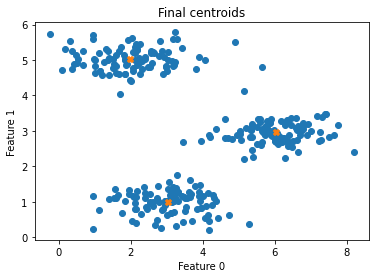

In [106]:
# Data with final centroids
plt.scatter(X[:,0], X[:,1])
plt.scatter(centroids[:, 0], centroids[:,1], marker="X")
plt.title("Final centroids")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


# Image compression with K-means
- in a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.

## We want to compress image from 24-bit (16,777,216 possible color) to 4-bit (16 possible color)

### 1- Loading img 

In [3]:
# load image of a brid
original_img = plt.imread("bird_small.png")

In [4]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


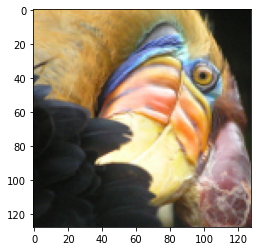

In [5]:
plt.imshow(original_img)

- First we need to transform 3-D matrix into a two-dimensional matrix.
- number of pixels = lenth * width of img = 128 * 128 = 16384 

In [6]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1],3)) 

In [7]:
X_img.shape

(16384, 3)

### 2- Find 16 centroids 

In [33]:
#run k-means
centroids, c_i = kMeans_model(X_img, 16, 10) 

K-Means iteration 0/10
K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10


### 3- Visualize 16 centroids colors

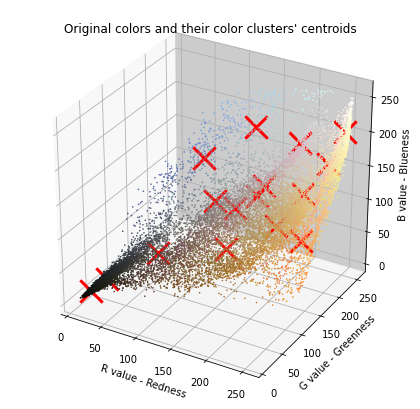

In [35]:
plot_kMeans_RGB(X_img, centroids, c_i, 16)

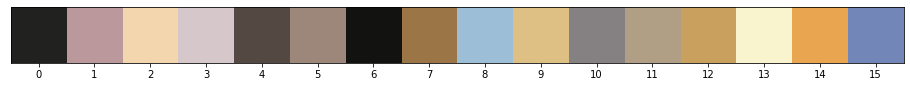

In [36]:
show_centroid_colors(centroids)

### 4- Assign each pixel to nearest centroid

In [37]:
nereast_centroids= find_closest_centroid(X_img, centroids)

In [42]:
np.unique(nereast_centroids)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15.])

In [55]:
# make indices integer values 
nereast_centroids = nereast_centroids.astype(int)

In [56]:
# Replace each pixel with the color of the closest centroid
new_img  = centroids[nereast_centroids, :]

In [54]:
new_img

array([[0.79221368, 0.63046157, 0.37532949],
       [0.87237507, 0.75528103, 0.52107888],
       [0.87237507, 0.75528103, 0.52107888],
       ...,
       [0.13141873, 0.13634343, 0.12627946],
       [0.13141873, 0.13634343, 0.12627946],
       [0.13141873, 0.13634343, 0.12627946]])

### 5- reshape new_img to original images dimensions


In [59]:
new_img= np.reshape(new_img, original_img.shape)

In [57]:
k = 16

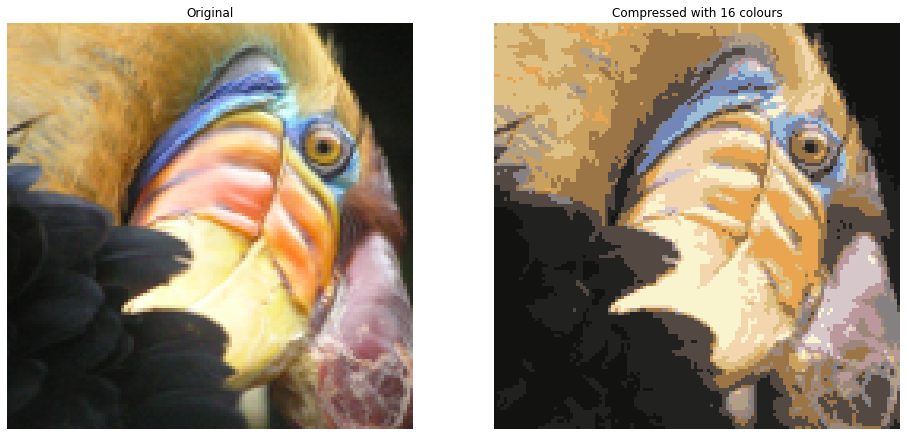

In [60]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(new_img)
ax[1].set_title(f'Compressed with {k} colours')
ax[1].set_axis_off()